You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

&nbsp;

&nbsp;

***
Utilize your unsupervised learning skills to clusters in the penguins dataset!

Import, investigate and pre-process the "penguins.csv" dataset.
Perform a cluster analysis based on a reasonable number of clusters and collect the average values for the clusters. The output should be a DataFrame named stat_penguins with one row per cluster that shows the mean of the original variables (or columns in "penguins.csv") by cluster. stat_penguins should not include any non-numeric columns.

In [7]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


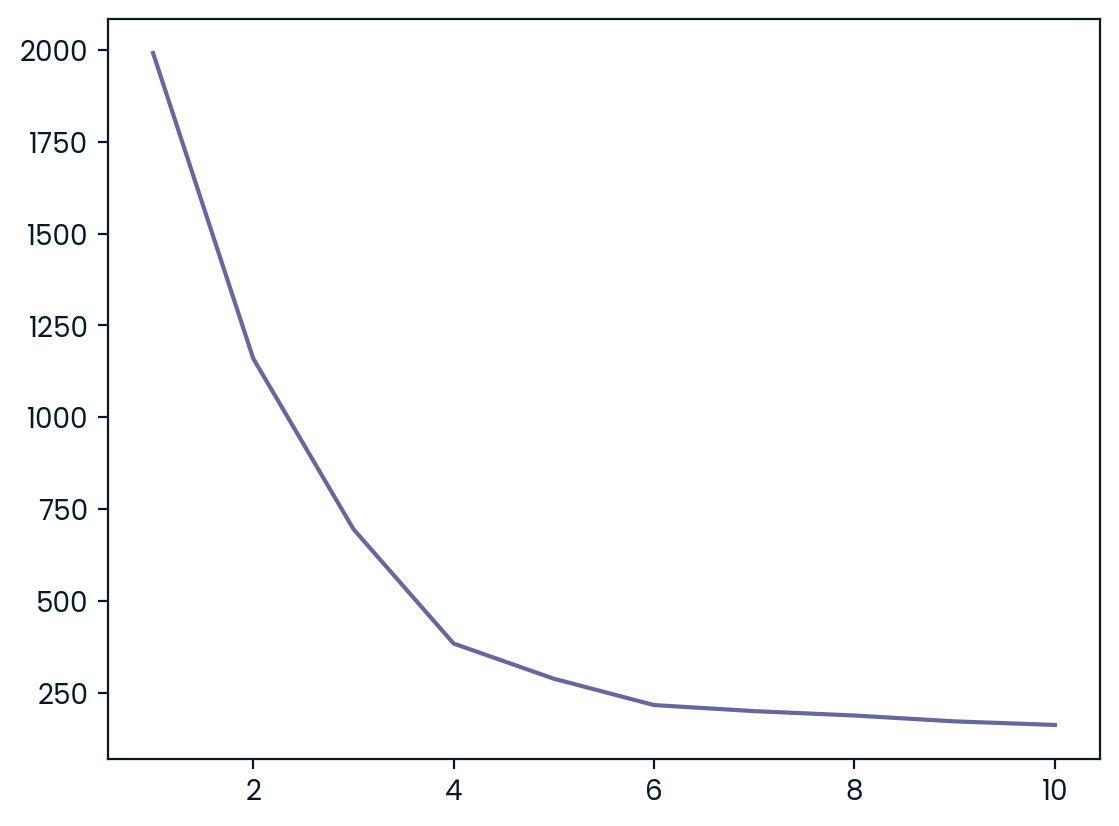

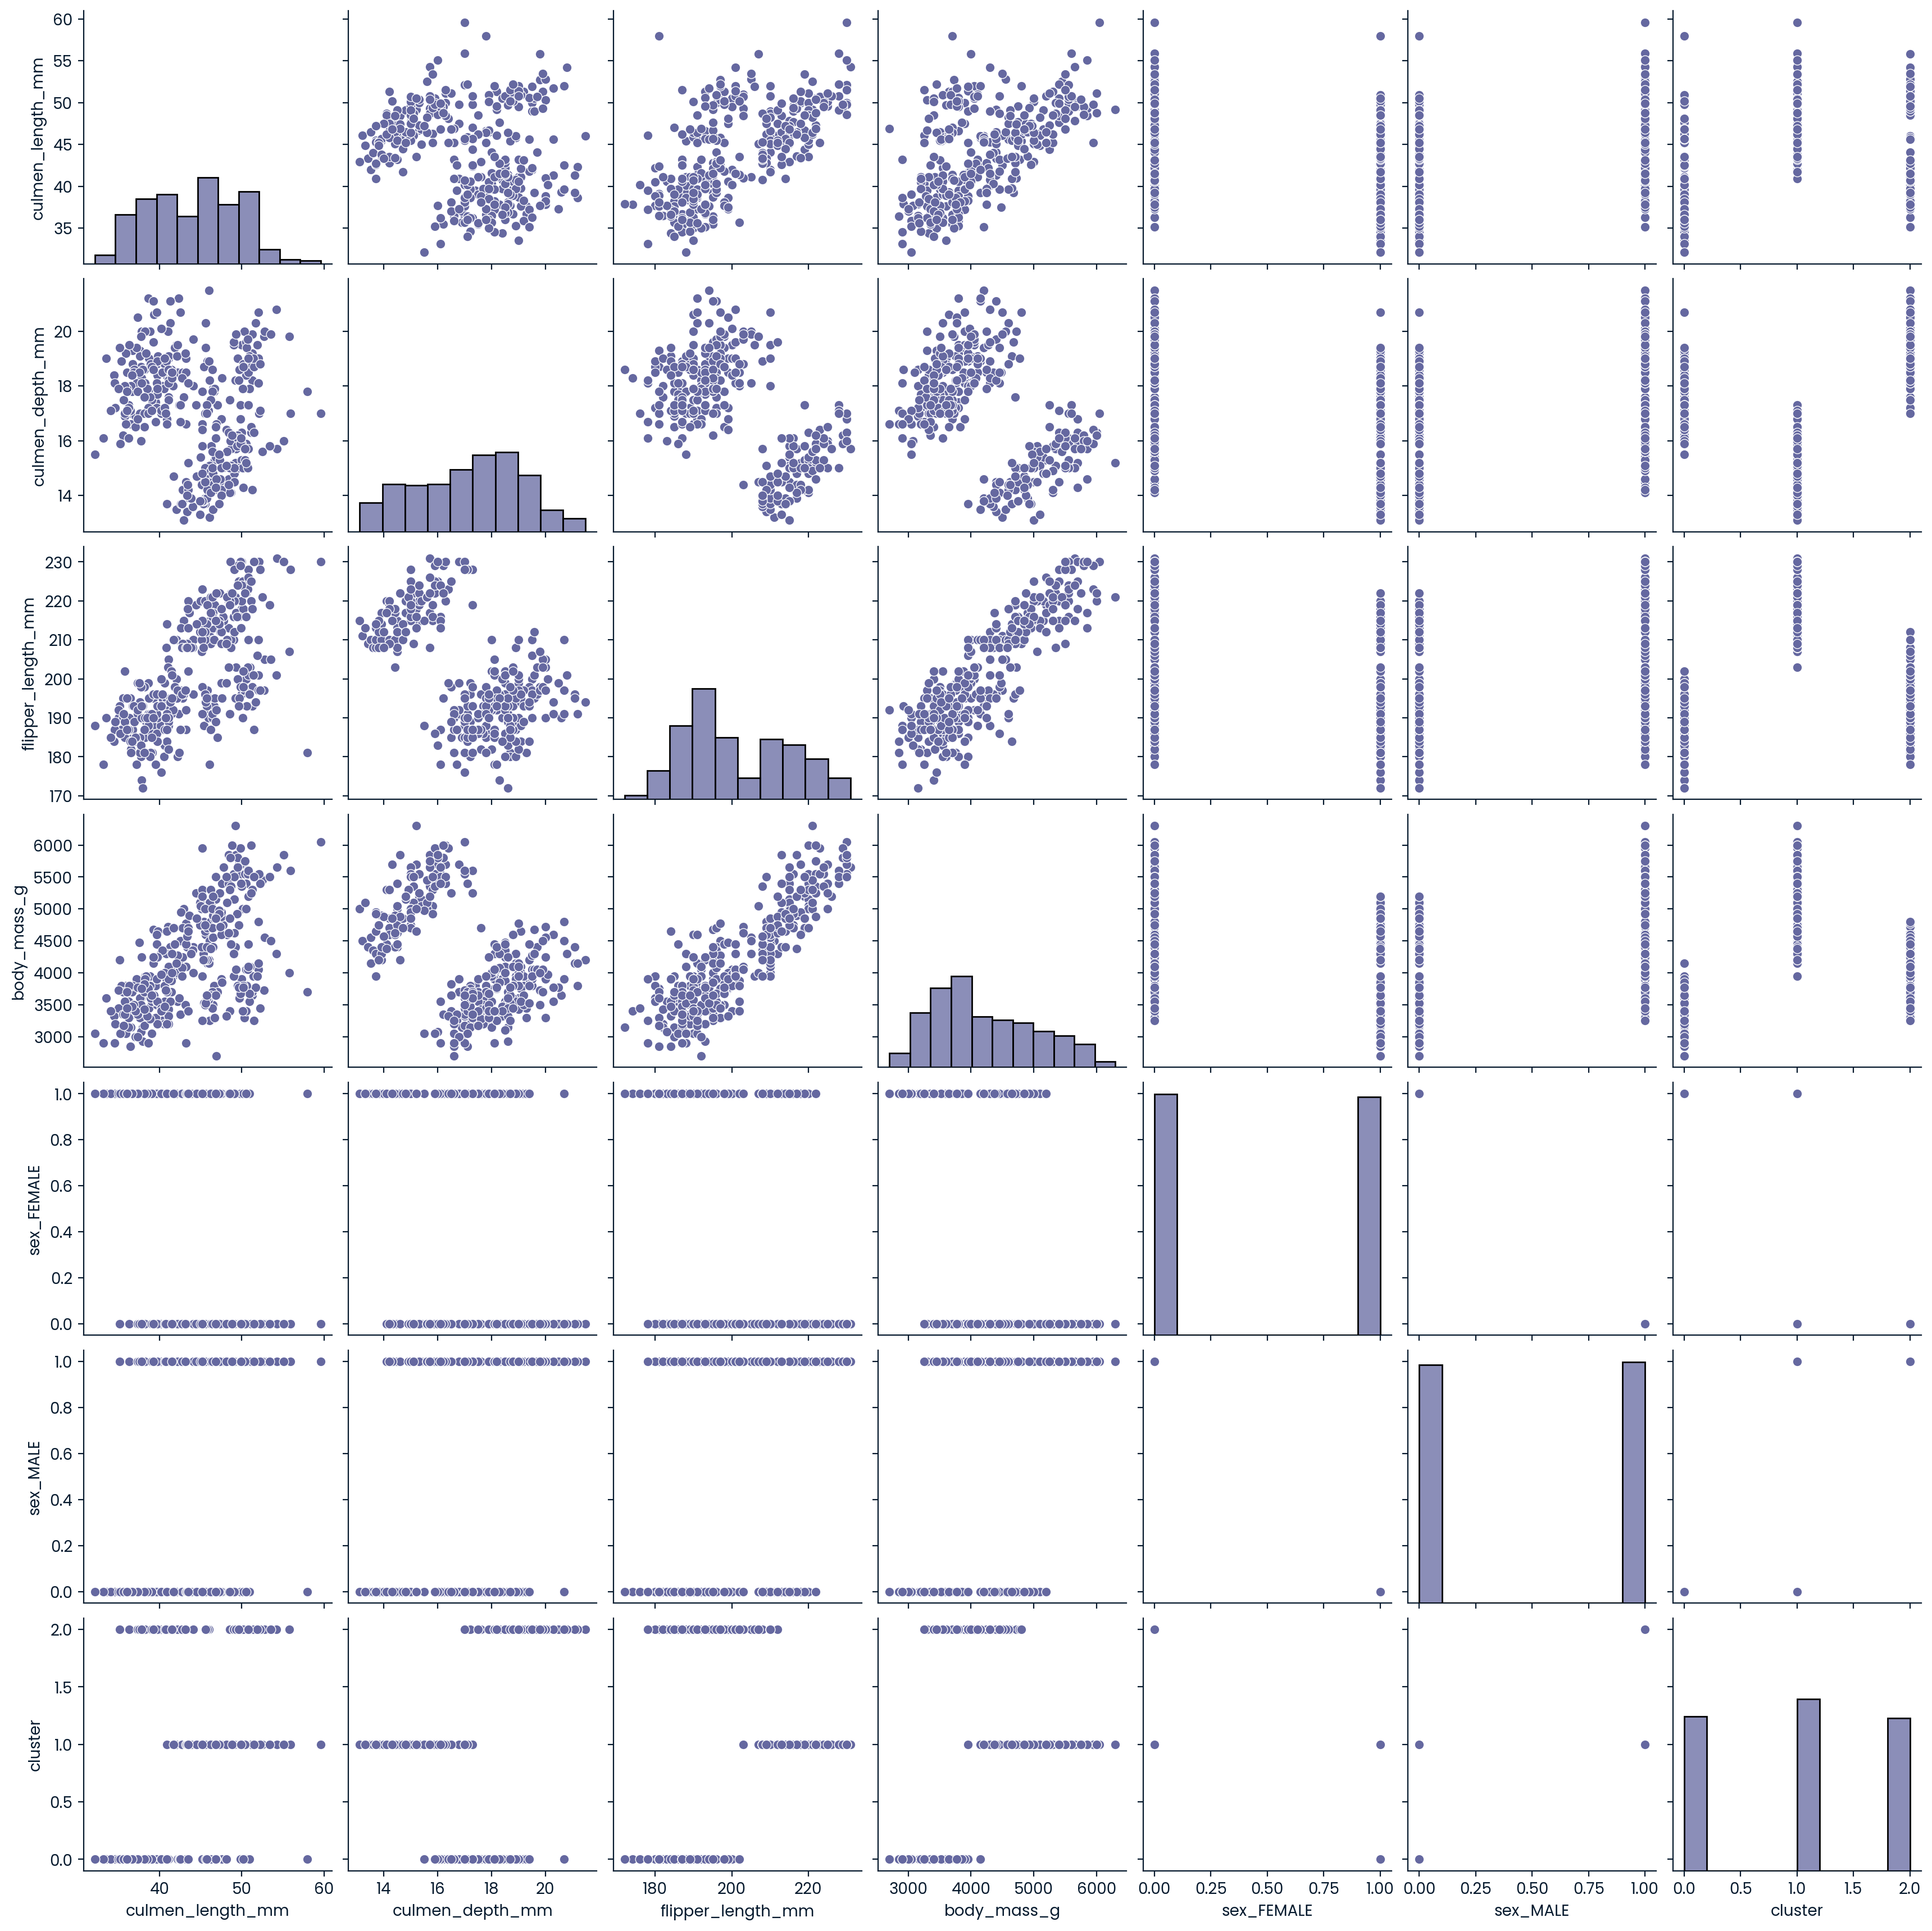

In [8]:
pd.set_option("display.max_rows", 0)
df_dum = pd.get_dummies(penguins_df)

scaler = StandardScaler()
X = scaler.fit_transform(df_dum)

inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

df_dum["cluster"] = kmeans.labels_

sns.pairplot(data=df_dum)
plt.show()

stat_penguins = df_dum.groupby("cluster").mean()